# **═══ Import Libraries ═══**

In [120]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

#for Neural Network
from keras import layers
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from keras.initializers import HeNormal
from keras import regularizers
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# **═══ Exploratory Data Analysis ═══**

In [121]:
df = pd.read_csv("EngineFaultDB_Final.csv")
df

Fault    MAP    TPS   Force  Power       RPM  Consumption L/H  \
0          0  3.549  1.889   7.428  5.227  1192.769            3.057   
1          0  3.559  1.899   7.646  5.327  1145.191            2.914   
2          0  3.539  1.899   7.578  5.100  1208.505            2.976   
3          0  3.519  1.889   7.371  5.255  1164.127            2.908   
4          0  3.549  1.879   7.405  5.177  1172.032            2.898   
...      ...    ...    ...     ...    ...       ...              ...   
55994      3  1.971  1.278  92.665  3.589  4584.034            5.423   
55995      3  1.879  1.258  96.644  3.579  4662.496            5.655   
55996      3  1.960  1.288  93.961  3.493  4792.675            5.542   
55997      3  1.930  1.299  95.379  3.618  4563.732            5.525   
55998      3  1.930  1.299  95.379  3.618  4563.732            5.525   

       Consumption L/100KM    Speed     CO       HC     CO2     O2  Lambda  \
0                   11.720   24.901  0.460  196.089  14.356  1.080   1.047   
1                   11.276   25.030  0.478  196.283  14.492  1.107   1.083   
2                   11.926   24.213  0.464  200.367  14.443  1.099   1.072   
3                   11.786   24.407  0.471  195.345  13.853  1.076   1.006   
4                   12.169   24.875  0.468  194.979  13.752  1.060   0.984   
...                    ...      ...    ...      ...     ...    ...     ...   
55994                5.623   95.090  0.902  162.065  13.123  0.568   0.966   
55995                5.578  100.032  0.926  161.237  13.591  0.585   1.030   
55996                5.572   98.595  0.925  160.030  12.999  0.579   0.974   
55997                5.568   98.575  0.942  159.800  13.187  0.579   0.990   
55998                5.568   98.575  0.942  159.800  13.187  0.579   0.990   

          AFR  
0      15.385  
1      15.926  
2      15.754  
3      14.787  
4      14.470  
...       ...  
55994  14.200  
55995  15.147  
55996  14.324  
55997  14.550  
55998  14.550  

[55999 rows x 15 columns]

In [122]:
df.shape

(55999, 15)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55999 entries, 0 to 55998
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fault                55999 non-null  int64  
 1   MAP                  55999 non-null  float64
 2   TPS                  55999 non-null  float64
 3   Force                55999 non-null  float64
 4   Power                55999 non-null  float64
 5   RPM                  55999 non-null  float64
 6   Consumption L/H      55999 non-null  float64
 7   Consumption L/100KM  55999 non-null  float64
 8   Speed                55999 non-null  float64
 9   CO                   55999 non-null  float64
 10  HC                   55999 non-null  float64
 11  CO2                  55999 non-null  float64
 12  O2                   55999 non-null  float64
 13  Lambda               55999 non-null  float64
 14  AFR                  55999 non-null  float64
dtypes: float64(14), int64(1)
memory usag

In [124]:
df.isnull().sum()

Fault                  0
MAP                    0
TPS                    0
Force                  0
Power                  0
RPM                    0
Consumption L/H        0
Consumption L/100KM    0
Speed                  0
CO                     0
HC                     0
CO2                    0
O2                     0
Lambda                 0
AFR                    0
dtype: int64

In [125]:
df.corr()

Fault       MAP       TPS     Force     Power  \
Fault                1.000000 -0.072753 -0.025270 -0.049601  0.117879   
MAP                 -0.072753  1.000000  0.884219  0.880061  0.629456   
TPS                 -0.025270  0.884219  1.000000  0.891460  0.582596   
Force               -0.049601  0.880061  0.891460  1.000000  0.621402   
Power                0.117879  0.629456  0.582596  0.621402  1.000000   
RPM                  0.205279  0.201352  0.092894  0.072542  0.403647   
Consumption L/H      0.056363  0.697801  0.647843  0.719759  0.695179   
Consumption L/100KM -0.128618  0.739555  0.806927  0.848365  0.473038   
Speed                0.203806  0.201107  0.092682  0.071914  0.405901   
CO                  -0.224785  0.134665  0.253781  0.216722  0.060640   
HC                  -0.172228  0.044645 -0.098425 -0.002452  0.101330   
CO2                 -0.078492 -0.049704 -0.163978 -0.125891 -0.041272   
O2                  -0.068178 -0.157730 -0.330770 -0.274184 -0.161577   
Lambda               0.187571 -0.144828 -0.261230 -0.231231 -0.078817   
AFR                  0.187584 -0.144827 -0.261220 -0.231229 -0.078808   

                          RPM  Consumption L/H  Consumption L/100KM     Speed  \
Fault                0.205279         0.056363            -0.128618  0.203806   
MAP                  0.201352         0.697801             0.739555  0.201107   
TPS                  0.092894         0.647843             0.806927  0.092682   
Force                0.072542         0.719759             0.848365  0.071914   
Power                0.403647         0.695179             0.473038  0.405901   
RPM                  1.000000         0.603519            -0.197747  0.996894   
Consumption L/H      0.603519         1.000000             0.614128  0.603262   
Consumption L/100KM -0.197747         0.614128             1.000000 -0.197161   
Speed                0.996894         0.603262            -0.197161  1.000000   
CO                  -0.020227         0.358751             0.441402 -0.019955   
HC                   0.236539         0.375354             0.027346  0.236040   
CO2                 -0.015877        -0.313437            -0.349849 -0.016246   
O2                  -0.080016        -0.251838            -0.290361 -0.080890   
Lambda              -0.004557        -0.347567            -0.412699 -0.005199   
AFR                 -0.004525        -0.347545            -0.412697 -0.005167   

                           CO        HC       CO2        O2    Lambda  \
Fault               -0.224785 -0.172228 -0.078492 -0.068178  0.187571   
MAP                  0.134665  0.044645 -0.049704 -0.157730 -0.144828   
TPS                  0.253781 -0.098425 -0.163978 -0.330770 -0.261230   
Force                0.216722 -0.002452 -0.125891 -0.274184 -0.231231   
Power                0.060640  0.101330 -0.041272 -0.161577 -0.078817   
RPM                 -0.020227  0.236539 -0.015877 -0.080016 -0.004557   
Consumption L/H      0.358751  0.375354 -0.313437 -0.251838 -0.347567   
Consumption L/100KM  0.441402  0.027346 -0.349849 -0.290361 -0.412699   
Speed               -0.019955  0.236040 -0.016246 -0.080890 -0.005199   
CO                   1.000000  0.445796 -0.868488 -0.435150 -0.899408   
HC                   0.445796  1.000000 -0.413162  0.199745 -0.352851   
CO2                 -0.868488 -0.413162  1.000000  0.360441  0.852599   
O2                  -0.435150  0.199745  0.360441  1.000000  0.519821   
Lambda              -0.899408 -0.352851  0.852599  0.519821  1.000000   
AFR                 -0.899417 -0.352841  0.852599  0.519842  0.999990   

                          AFR  
Fault                0.187584  
MAP                 -0.144827  
TPS                 -0.261220  
Force               -0.231229  
Power               -0.078808  
RPM                 -0.004525  
Consumption L/H     -0.347545  
Consumption L/100KM -0.412697  
Speed               -0.005167  
CO                  -0.899417  
HC                  -0.352841  
CO2  

In [126]:
dr = df.copy() # Membuat copy dari dataset awal
dr.drop(["Fault"], axis = 1, inplace = True) # Drop kolom label

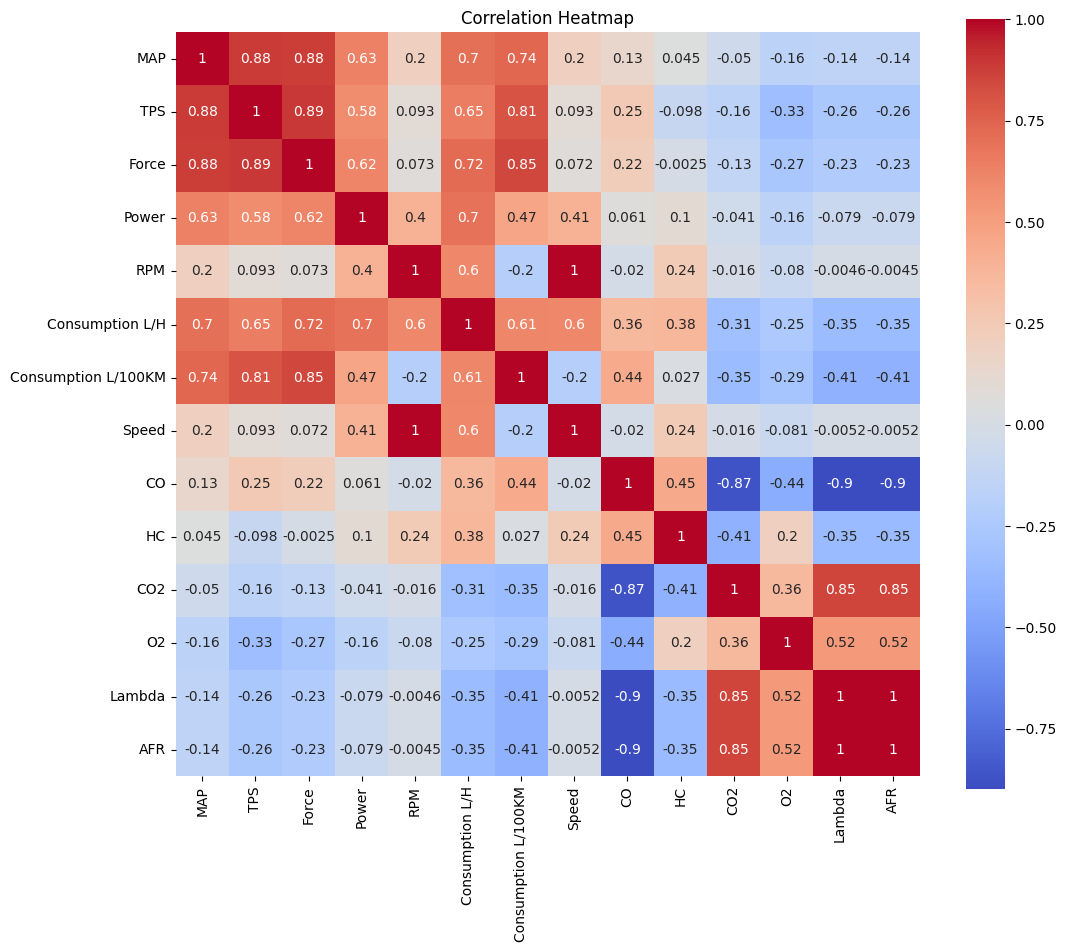

In [127]:
numeric_dr = dr.select_dtypes(include=[np.number])
corr = numeric_dr.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [128]:
class_count = df["Fault"].value_counts()
print(class_count)

Fault
0    16000
2    15000
3    14001
1    10998
Name: count, dtype: int64


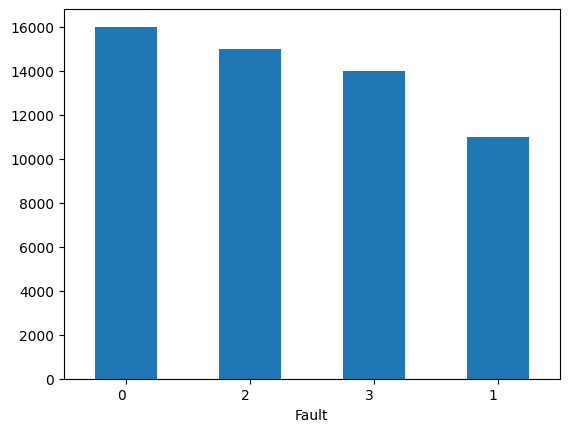

In [129]:
class_count = df["Fault"].value_counts().plot(kind= 'bar')
plt.xticks(rotation= 0, ha= 'right');

# **═══ Preparing Dataset ═══**

## **═══ Original Dataset ═══**

In [130]:
X = df.copy() # Membuat copy dari dataset awal
X.drop(["Fault"], axis = 1, inplace = True) # Drop kolom label
y = df["Fault"]
print(X.columns)

Index(['MAP', 'TPS', 'Force', 'Power', 'RPM', 'Consumption L/H',
       'Consumption L/100KM', 'Speed', 'CO', 'HC', 'CO2', 'O2', 'Lambda',
       'AFR'],
      dtype='object')


In [131]:
print(X.shape, y.shape)

(55999, 14) (55999,)


In [132]:
# Coba StandardScaler(-1 to 1) / MinMaxScaler(0-1)
scaler = StandardScaler()
#scaler = MinMaxScaler()
X_o_scaled = scaler.fit_transform(X)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X_o_scaled, y, test_size = 0.15, random_state = 42)

In [134]:
print(X_train.shape, X_test.shape)

(47599, 14) (8400, 14)


# **═══ Building Model ═══**

In [135]:
model = Sequential([
    Dense(14, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(9, activation='relu'),
    Dense(9, activation='relu'),
    Dense(4, activation='softmax')
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 14)                210       
                                                                 
 dense_19 (Dense)            (None, 9)                 135       
                                                                 
 dense_20 (Dense)            (None, 9)                 90        
                                                                 
 dense_21 (Dense)            (None, 4)                 40        
                                                                 
Total params: 475
Trainable params: 475
Non-trainable params: 0
_________________________________________________________________


In [136]:
model.compile(optimizer=Adam(0.0005),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

# **═══ Training Model ═══**

In [137]:
history = model.fit(X_train, y_train,
    epochs=10,
    batch_size=32,
    shuffle = True,
    validation_split=0.15,
    verbose = 1)

Epoch 1/10
1265/1265 [==============================] - 5s 3ms/step - loss: 1.0755 - accuracy: 0.4838 - val_loss: 0.7254 - val_accuracy: 0.6403
Epoch 2/10
1265/1265 [==============================] - 4s 3ms/step - loss: 0.5910 - accuracy: 0.6857 - val_loss: 0.4939 - val_accuracy: 0.7382
Epoch 3/10
1265/1265 [==============================] - 4s 3ms/step - loss: 0.4516 - accuracy: 0.7433 - val_loss: 0.4130 - val_accuracy: 0.7573
Epoch 4/10
1265/1265 [==============================] - 4s 3ms/step - loss: 0.3993 - accuracy: 0.7496 - val_loss: 0.3805 - val_accuracy: 0.7525
Epoch 5/10
1265/1265 [==============================] - 3s 3ms/step - loss: 0.3770 - accuracy: 0.7487 - val_loss: 0.3655 - val_accuracy: 0.7546
Epoch 6/10
1265/1265 [==============================] - 4s 3ms/step - loss: 0.3667 - accuracy: 0.7502 - val_loss: 0.3588 - val_accuracy: 0.7587
Epoch 7/10
1265/1265 [==============================] - 4s 3ms/step - loss: 0.3610 - accuracy: 0.7519 - val_loss: 0.3558 - val_accuracy:

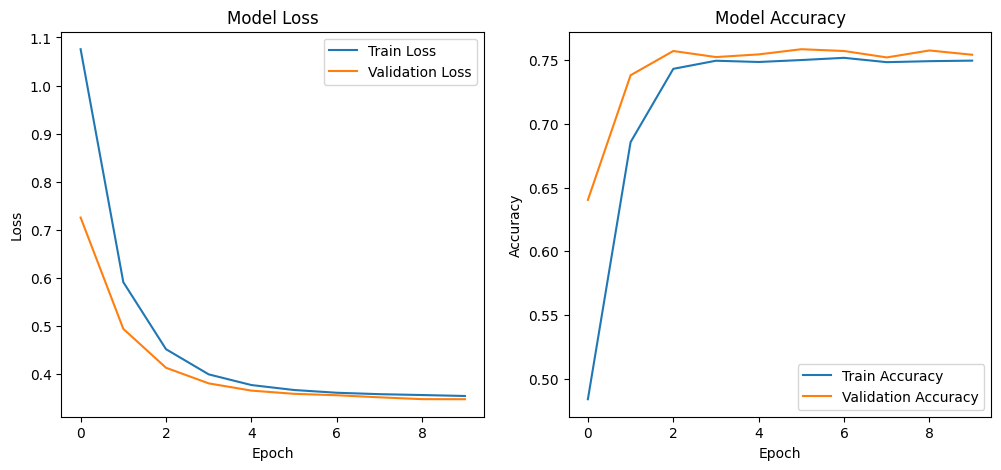

In [138]:
# Plot training & validation loss values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# **═══ Model Evaluation with Original Dataset ═══**

In [139]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

263/263 [==============================] - 0s 2ms/step - loss: 0.3541 - accuracy: 0.7488
Test Accuracy: 0.7488


In [140]:
# Get prediction probabilities from model
y_pred_probs = model.predict(X_test)

# Choose the class with highest probability
y_pred_class = np.argmax(y_pred_probs, axis=1)

print(classification_report(y_test, y_pred_class))

263/263 [==============================] - 0s 824us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2379
           1       1.00      1.00      1.00      1678
           2       0.52      0.85      0.64      2249
           3       0.49      0.16      0.24      2094

    accuracy                           0.75      8400
   macro avg       0.75      0.75      0.72      8400
weighted avg       0.74      0.75      0.71      8400



In [141]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

precision = round(precision_score(y_test, y_pred_class, average='weighted'), 3)
recall = round(recall_score(y_test, y_pred_class, average='weighted'), 3)
f1 = round(f1_score(y_test, y_pred_class, average='weighted'), 3)
accuracy = round(accuracy_score(y_test, y_pred_class), 3)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

Precision: 0.744
Recall: 0.749
F1 Score: 0.714
Accuracy: 0.749


In [142]:
y_test.value_counts()

Fault
0    2379
2    2249
3    2094
1    1678
Name: count, dtype: int64

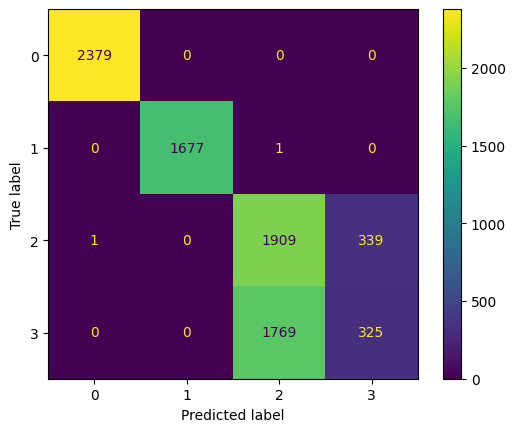

In [143]:
# plot confusion matrix
cm = confusion_matrix(y_test, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# **═══ Saving Model ═══**

In [144]:
model.save('Engine_Fault-small.h5')

In [145]:
import joblib

joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [146]:
columns = ['MAP', 'TPS', 'Force', 'Power', 'RPM', 'Consumption L/H',
           'Consumption L/100KM', 'Speed', 'CO', 'HC', 'CO2', 'O2', 'Lambda',
           'AFR']

X_test_unscaled = scaler.inverse_transform(X_test)
df = pd.DataFrame(X_test_unscaled, columns=columns)

# Save as CSV
df.to_csv('x_test.csv', index=False, float_format="%.3f")

# 1D CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense, Dropout, InputLayer

X_train = X_train.reshape(-1, X_train.shape[1], 1)
X_test = X_test.reshape(-1, X_test.shape[1], 1)

model = Sequential([
    InputLayer(input_shape=(X_train.shape[1], 1)),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')  
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [154]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.15)

# Evaluate
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

Epoch 1/10
1265/1265 [==============================] - 5s 4ms/step - loss: 1.0240 - accuracy: 0.5229 - val_loss: 0.6922 - val_accuracy: 0.6714
Epoch 2/10
1265/1265 [==============================] - 4s 4ms/step - loss: 0.6432 - accuracy: 0.6752 - val_loss: 0.5182 - val_accuracy: 0.7251
Epoch 3/10
1265/1265 [==============================] - 4s 4ms/step - loss: 0.5352 - accuracy: 0.7058 - val_loss: 0.4649 - val_accuracy: 0.7277
Epoch 4/10
1265/1265 [==============================] - 4s 3ms/step - loss: 0.4875 - accuracy: 0.7167 - val_loss: 0.4206 - val_accuracy: 0.7405
Epoch 5/10
1265/1265 [==============================] - 4s 3ms/step - loss: 0.4619 - accuracy: 0.7258 - val_loss: 0.4051 - val_accuracy: 0.7424
Epoch 6/10
1265/1265 [==============================] - 4s 4ms/step - loss: 0.4446 - accuracy: 0.7268 - val_loss: 0.3951 - val_accuracy: 0.7434
Epoch 7/10
1265/1265 [==============================] - 4s 3ms/step - loss: 0.4326 - accuracy: 0.7297 - val_loss: 0.3954 - val_accuracy:

In [155]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

precision = round(precision_score(y_test, y_pred_class, average='weighted'), 3)
recall = round(recall_score(y_test, y_pred_class, average='weighted'), 3)
f1 = round(f1_score(y_test, y_pred_class, average='weighted'), 3)
accuracy = round(accuracy_score(y_test, y_pred_class), 3)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

Precision: 0.744
Recall: 0.749
F1 Score: 0.714
Accuracy: 0.749


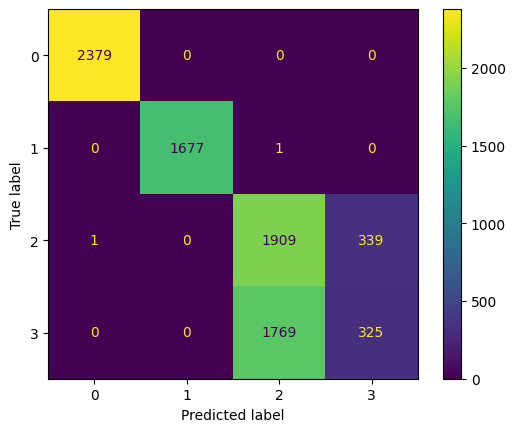

In [156]:
cm = confusion_matrix(y_test, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [157]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 12, 32)            128       
                                                                 
 global_max_pooling1d_3 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_28 (Dense)            (None, 64)                2112      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_29 (Dense)            (None, 4)                 260       
                                                                 
Total params: 2,500
Trainable params: 2,500
Non-trainable params: 0
____________________________________________________